# Data access
This notebook demonstrate access to different data types:
- csv file using Pandas
- Zip file
- Connection
- Connected data

The data access is only done using Pandas dataframe. Other sections of the Trustworthy AI lab
will demonstrate how data can be read using Spark dataframes.

<img src='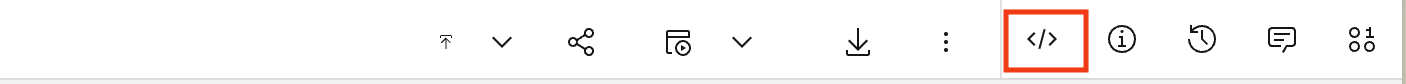
'/>

Click the **Code Snippets** icon in the top bar of the screen (it looks like </>). The **Read data** sidebar will open. After clicking the **Select data from project** button a new window should appear. Click the **Data asset** options in this window, you can see files including:

- modeling_records_2022.csv
- Demofiles.zip
- TESTING

Note that the TESTING asset is actually the connected data from previous steps in the lab.

Under the connections tab you can find:
- Db2

Feel free to close this window now. We will use it in the next step.

In [ ]:
# import needed libraries
import pandas as pd
import numpy as np

import zipfile
from io import BytesIO

## Accessing a csv file as a Pandas dataframe

Place your cursor in the empty code cell below. If the **Read data** sidebar is not already open on the right side of the screen, click the **Code snippets (</>)** button in the upper right corner of the screen to open it. Click the **Read data** button, then the **Select data from project** option. 

A new window will open. Click the **Data asset** option and then from the listed files find and click **modeling_records_2022.csv**. Now click the **Select** button in the bottom right of the window. 

The window will close and you should return to the **Read data** sidebar. Ensure the **Load as** option is **pandas DataFrame**. 

Now click the **Insert code to cell** button at the bottom of the sidebar.

Several lines of code containing an API key, authorization endpoint, and connection information for the file will be added to the cell. Finally, the contents of the file will be read into a pandas dataframe, likely called `df_data_1`.

## Accessing a zip file using the streaming body object

The **Demofiles.zip** file is not in columnar format, and cannot be read into a dataframe. Instead, you can access the data by using a **StreamingBody** object.

Once you have imported the file into a **StreamingBody** object, you can extract the file content to the notebook's local filesystem, which allows the notebook to use the assets in it.

Place your cursor in the empty code cell below. If the **Read data** sidebar is not already open on the right side of the screen, click the **Code snippets (</>)** button in the upper right corner of the screen to open it.

Click the **Read data** button, then the **Select data from project** button. A new window will open. From there select the **Data asset** option and then find the **Demofiles.zip** file to select. Click the **Select** button at the bottom right of the window.

The window will close and you should return to the **Read data** sidebar. Ensure the **Load as** option as **StreamingBody object**. 

Finally, click the **Insert code to cell** button. 

Several lines of code containing an API key, authorization endpoint, and connection information for the file will be added to the cell. Finally, the contents of the file will be read into a pandas dataframe, likely called `streaming_body_2`.

**<span style="color:red">Before you run the cell with the generated code</span>**, edit it to ensure that it uses the `streaming_body_2` variable. The last code line before the comments should look like this:
`streaming_body_2 = client_...`

Run the code cell above, loading data into the `streaming_body_2` variable, then run the three cells below to unzip the file into the notebook's local file system, verify that the files are available, and then remove them.

In [ ]:
# Unzipping the file using the streaming body
myzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()))
myzip.extractall('.')

In [ ]:
# List the content of the current directory from the local filesystem
!ls -lR

In [ ]:
# remove all files and directories from the current directory of the local filesystem
!rm -rf *

## Loading a file to local storage
To load a file into the notebook's local storage, you have to use a streaming body just like in the previous section, except that instead of extracting the file content directly to the filesystem, 
you will save it as a file.

As you did previously, place your cursor in the empty code cell below. If the **Data** window is not already open on the right side of the screen, click the **Code snippets (</>)** button in the upper right corner of the screen to open it.

Follow the same process as before to open the **Select data from project** window but this time select the **Demofiles.zip** file. 

Once you've selected the file and clicked the **Select** button in the window you will return to the **Read data** sidebar. 

Ensure the **Load as** dropdown is set to **StreamingBody object** before clicking **Insert to code cell** button. **<span style="color:red">Once again, edit the cell to ensure that it uses the `streaming_body_2` variable.</span>** The last code line before the comments should look like this:
`streaming_body_2 = client_...`

Run the next two cells to write the zip file to the notebook's local file system, and verify that it is available.

In [ ]:
with open("Demofiles2.zip", "wb") as outfile :
    outfile.write(BytesIO(streaming_body_2.read()).getbuffer())


In [ ]:
# List the content of the current directory of the local filesystem
!ls -l 

## Extract the files from the local zipfile using Linux commands

The notebook environment provides access to Linux command line commands such as `ls`. You can execute them in code cells by adding a `!` to the beginning of the command, as you saw in the previous cell.

In [ ]:
!unzip Demofiles2.zip

In [ ]:
# List the content of the current directory from the local filesystem

!ls -lR

In [ ]:
# remove all files and directories from the current directory of the local filesystem
!rm -rf *

## Accessing connected data as a Pandas dataframe
A connected data asset behaves like a csv file. Place your cursor in the empty code cell below. If the **Read data** sidebar is not already open on the right side of the screen, click the **Code snippets (</>)** button in the upper right corner of the screen to open it.

You'll follow the same steps as before but this time in the **Select data from project** window select the **Connection** option and find the **TESTING** option. 

After clicking the **Select** button ensure the **Load as** option is set to **pandas DataFrame** in the **Read data** sidebar. Ensure you've selected the empy code cell below this and then click the **Insert to code cell** button.


When you run the generated code, the notebook will print the first five rows of data from the connected **TESTING** asset, just like the first five rows of the CSV file you imported earlier.

### Notes on connected data
You can see in the previous cell that the username (uid) and password(pwd) are visible. This is why the database connection available to users should use a user that has the minimum access right needed to complete the task.

In this case, you have used a user with administrator privileges. This is fine in this example code, but should NEVER be used in any projects or in production.

Note also that the cell starts with **`"# @hidden_cell"`**. This means that if the notebook
is exported, the cell content won't be included.

### Important masked access notes:
You surely noticed that the masked data was visible after reading the connected data. This is because you are using the database connection directly. It is possible to preserve the data masking by using a data virtualization connection, but this is currently beyond the scope of this lab.